<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [6]:
!ls /content/drive/MyDrive/KKNV

full_pheno.csv	    HBN_R4_Pheno.csv  HBN_R9_Pheno.csv	  Query1.csv
HBN_R10_Pheno.csv   HBN_R5_Pheno.csv  iq_overview.csv	  Query2.csv
HBN_R1_1_Pheno.csv  HBN_R6_Pheno.csv  iq_overview.gsheet  Query_final.csv
HBN_R2_1_Pheno.csv  HBN_R7_Pheno.csv  Pheno.csv
HBN_R3_Pheno.csv    HBN_R8_Pheno.csv  pheno_mri.csv


## File informations from different releases

In [ ]:
!ls /content/drive/MyDrive/KKNV

full_pheno.csv	    HBN_R3_Pheno.csv  HBN_R7_Pheno.csv	iq_overview.gsheet
HBN_R10_Pheno.csv   HBN_R4_Pheno.csv  HBN_R8_Pheno.csv	Pheno.csv
HBN_R1_1_Pheno.csv  HBN_R5_Pheno.csv  HBN_R9_Pheno.csv	Query_final.csv
HBN_R2_1_Pheno.csv  HBN_R6_Pheno.csv  iq_overview.csv


In [ ]:
# info on whether there are phenotypical full files and imaging data availale
file1 = pd.read_csv(
    working_path.joinpath('HBN_R1_1_Pheno.csv'),
    index_col=None
)
file2 = pd.read_csv(
    working_path.joinpath('HBN_R2_1_Pheno.csv'),
    index_col=None
)
file3 = pd.read_csv(
    working_path.joinpath('HBN_R3_Pheno.csv'),
    index_col=None
)
file4 = pd.read_csv(
    working_path.joinpath('HBN_R4_Pheno.csv'),
    index_col=None
)
file5 = pd.read_csv(
    working_path.joinpath('HBN_R5_Pheno.csv'),
    index_col=None
)
file6 = pd.read_csv(
    working_path.joinpath('HBN_R6_Pheno.csv'),
    index_col=None
)
file7 = pd.read_csv(
    working_path.joinpath('HBN_R7_Pheno.csv'),
    index_col=None
)
file8 = pd.read_csv(
    working_path.joinpath('HBN_R8_Pheno.csv'),
    index_col=None
)
file9 = pd.read_csv(
    working_path.joinpath('HBN_R9_Pheno.csv'),
    index_col=None
)
file10 = pd.read_csv(
    working_path.joinpath('HBN_R10_Pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno = pd.concat([file1, file2])
fullpheno = pd.concat([fullpheno, file3])
fullpheno = pd.concat([fullpheno, file4])
fullpheno = pd.concat([fullpheno, file5])
fullpheno = pd.concat([fullpheno, file6])
fullpheno = pd.concat([fullpheno, file7])
fullpheno = pd.concat([fullpheno, file8])
fullpheno = pd.concat([fullpheno, file9])
fullpheno = pd.concat([fullpheno, file10])

In [ ]:
fullpheno.to_csv(
    Path(working_path).joinpath('full_pheno.csv')
)

## Creating a file on MRI and full pheno information

In [ ]:
# file with the identifiers that have mri imaging
fullpheno = pd.read_csv(
    working_path.joinpath('full_pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [ ]:
print(fullpheno.shape)
print(len(fullpheno.EID.unique()))
# there are some identifiers that are repeated in the table

(5106, 6)
4245


In [ ]:
unique = []
repetition = []
for i in fullpheno.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(fullpheno.shape[0])
print(len(unique))
print(len(repetition))

5106
4245
861


In [ ]:
full_no_doubles = fullpheno.drop_duplicates()

In [ ]:
unique = []
repetition = []
for i in full_no_doubles.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    if i not in repetition:
      repetition.append(i)
print(full_no_doubles.shape[0])
print(len(unique))
print(len(repetition))
# still there is some repetition but let's see whether something disappears when we clean data

4263
4245
18


In [ ]:
full_no_doubles.groupby(['Full_Pheno']).count()

,EID,Sex,Age,EHQ_Total,Commercial_Use
Full_Pheno,,,,,
No,723,723,723,720,723
Yes,3539,3539,3539,3466,3539


In [ ]:
pheno_mri = full_no_doubles[full_no_doubles['Full_Pheno'] == 'Yes']
print(pheno_mri.shape)

(3539, 6)


In [ ]:
pheno_mri.groupby(['Sex']).count()
# Sex 1 - female, 0 - male

,EID,Age,EHQ_Total,Commercial_Use,Full_Pheno
Sex,,,,,
0.0,2272,2272,2223,2272,2272
1.0,1267,1267,1243,1267,1267


In [ ]:
pheno_mri.groupby(['Commercial_Use']).count()

,EID,Sex,Age,EHQ_Total,Full_Pheno
Commercial_Use,,,,,
No,561,561,561,526,561
Yes,2978,2978,2978,2940,2978


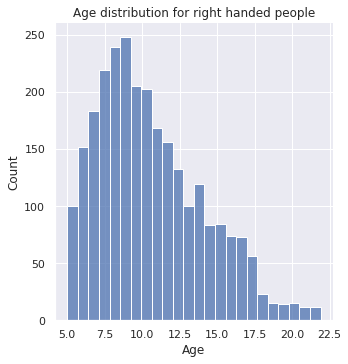

In [ ]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [ ]:
unique = []
repetition = []
for i in pheno_mri[pheno_mri['EHQ_Total'] >= 40].EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(pheno_mri[pheno_mri['EHQ_Total'] >= 40].shape[0])
print(len(unique))
print(len(repetition))
# There will be no repetition if we clean the data

2684
2684
0


In [ ]:
pheno_mri.to_csv(
    Path(working_path).joinpath('pheno_mri.csv')
)

## Pipeline to make the data convinient to use

In [7]:
# file with the identifiers that have mri imaging
pheno_mri = pd.read_csv(
    working_path.joinpath('pheno_mri.csv'),
    index_col=None
)

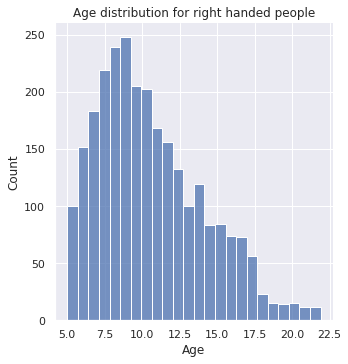

In [8]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [9]:
pheno_mri.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
pheno_mri.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [11]:
data = pd.read_csv(
    working_path.joinpath('Query_final.csv'),
    index_col=None,
    low_memory=False
)

In [12]:
# work on Identifiers column
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)	
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

8732
8732


**Crossreferencing to understand who has the full pheno**

In [13]:
print(pheno_mri.shape)
print(data.shape)

(3539, 6)
(8732, 168)


In [14]:
full_ids = pheno_mri.EID.values
data_ids = data.Identifiers.values.tolist()
hits = []
misses = []
indices = []
for i in data_ids:
  if i in full_ids:
    hits.append(i)
  elif i not in full_ids:
    misses.append(i)
    indices.append(data_ids.index(i))
print(len(hits))

3538


In [15]:
# One participant is missing from the data. It could be the case that the experiment is nor over.
for i in full_ids:
  if i not in hits:
    print(i)

NDARAL828WXM


In [16]:
pheno_mri[pheno_mri['EID'] == 'NDARAL828WXM']

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
2601,NDARAL828WXM,0.0,15.188569,63.34,Yes,Yes


In [142]:
data_pheno = data.copy()

In [143]:
for i in indices:
  data_pheno.drop([i], axis=0, inplace=True)

In [144]:
data_pheno.shape

(3538, 168)

Here is our reduced data frame with participant who has the full phenotypic file. Let's now choose only right handed participants.

In [145]:
# work on Age column
data_pheno['Basic_Demos,Age'] = data_pheno['Basic_Demos,Age'].astype(float)

In [146]:
# work on Sex column
data_pheno['Basic_Demos,Sex'] = data_pheno['Basic_Demos,Sex'].astype(int)

In [147]:
# work on Site column
data_pheno.drop(['Basic_Demos,Site'], axis=1, inplace=True)

In [148]:
data_pheno['Diagnosis_ClinicianConsensus,DX_01_Confirmed'].unique()

array([nan, '1', '0', '.'], dtype=object)

In [149]:
# work on Diagnosis column
# looks like a dot could be no diagnosis as it seems to be consistent across the columns
# there are also nan values in confirmed column
# throw away this 'No Diagnosis Given: Incomplete Eval'
# give 0 to these 'No Diagnosis Given'
def diagnosis(df, number):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Confirmed'
  diagnosis = df[name_diag].values
  confirmed = df[name_conf].values
  
  dyslexia = []
  new_diagnosis = []
  for i in range(0, df.shape[0]):
    # if it's nan values
    if type(diagnosis[i]) == float:
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's some type of LSD and 
    elif 'Specific Learning Disorder with' in diagnosis[i]:
      if confirmed[i] != '0':
        dyslexia.append(diagnosis[i])
        new_diagnosis.append('dys')
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)
    # if it's a dot or empty space
    elif diagnosis[i] == '.':
      dyslexia.append(0)
      new_diagnosis.append(0)
    elif diagnosis[i] == ' ':
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's an incomplete inquery
    elif 'Incomplete' in diagnosis[i]:
      dyslexia.append('Incomplete')
      new_diagnosis.append('Incomplete')
    # if it's no diagnosis
    elif diagnosis[i] == 'No Diagnosis Given':
      dyslexia.append(0)
      new_diagnosis.append(0)
    # if it's some other disorder
    else:
      if confirmed[i] != '0':
        dyslexia.append(0)
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)

  return dyslexia, new_diagnosis

In [150]:
all_diagnosis = {}
all_dys = {}
for i in range(1, 10):
  dyslexia, new_diagnosis = diagnosis(data_pheno, i)
  all_dys['diag_%s' % i] = dyslexia
  all_diagnosis['diag_%s' % i] = new_diagnosis

In [151]:
dys_status = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_dys:
    subset = all_dys[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    dys_status.append(0)
  elif len(participant) == 1:
    dys_status.append(participant[0])
  else:
    dys_status.append(participant)

In [152]:
all_status = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_diagnosis:
    subset = all_diagnosis[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    all_status.append(0)
  elif len(participant) == 1:
    all_status.append(participant[0])
  else:
    all_status.append(participant)

In [153]:
data_pheno['DD'] = dys_status
data_pheno['Diagnosis'] = all_status

In [154]:
for i in range(1,10):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(i)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Confirmed'
  name_code = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Code'
  data_pheno.drop([name_diag], axis=1, inplace=True)
  data_pheno.drop([name_conf], axis=1, inplace=True)
  data_pheno.drop([name_code], axis=1, inplace=True)
data_pheno.drop(['Diagnosis_ClinicianConsensus,DX_10'], axis=1, inplace=True)
data_pheno.drop(['Diagnosis_ClinicianConsensus,DX_10_Code'], axis=1, inplace=True)
data_pheno.drop(['Diagnosis_ClinicianConsensus,DX_10_Confirmed'], axis=1, inplace=True)

In [155]:
print('Control subjects')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] == 0)].shape[0])
print('Disorders w/out DD')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] != 0)].shape[0])
print('Disorders w DD')
print(data_pheno[data_pheno['DD'] != 0].shape[0])

Control subjects
465
Disorders w/out DD
2354
Disorders w DD
719


In [156]:
new_dtypes = []
dtypes = data_pheno.DD.values
for i in dtypes:
  if i == 0:
    new_dtypes.append(i)
  else:
    if type(i) == str:
      if 'Reading' in i:
        new_dtypes.append('Reading')
      elif 'Written' in i:
        new_dtypes.append('Writing')
      elif 'Mathematics' in i:
        new_dtypes.append('Math')
      elif 'Incomplete' in i:
        new_dtypes.append('Incomplete')
      else:
        print(i)
        break
    elif type(i) == list:
      if len(i) == 2:
        name1 = i[0][46:]
        name2 = i[1][46:]
        new_dtypes.append(name1 + ' and ' + name2)
      elif len(i) == 3:
        name1 = i[0][46:]
        name2 = i[1][46:]
        name3 = i[2][46:]
        new_dtypes.append(
            name1 + ' and ' + name2 + ' and ' + name3
            )
      else:
        print(i)
        break
    else:
      print(i)
      break

In [157]:
n_dtypes = []
for i in new_dtypes:
  if i == 'Reading and Written Expression and Mathematics' or i == 'Reading and Mathematics and Written Expression':
    n_dtypes.append('Reading and Math and Written Expression')
  elif i == 'Mathematics and Reading and Reading' or i == 'Mathematics and Reading':
    n_dtypes.append('Reading and Math')
  elif i == 'Reading and Mathematics ' or i == 'Reading and Mathematics' or i == 'Reading and Mathematics and Mathematics':
    n_dtypes.append('Reading and Math')
  elif i == 'Reading and Written Expression':
    n_dtypes.append('Reading and Written Expression')
  elif i == 'Mathematics and Written Expression' or i == 'Written Expression and Mathematics':
    n_dtypes.append('Math and Written Expression')
  elif i == 'Reading' or i == 'Reading and Reading':
    n_dtypes.append('Reading')
  elif i == 'Math':
    n_dtypes.append('Math')
  elif i == 'Writing':
    n_dtypes.append('Writing')
  elif i == 'Incomplete':
    n_dtypes.append('Incomplete')
  elif i == 0:
    n_dtypes.append(0)
  else:
    print(i)
    break

In [158]:
data_pheno['DD'] = n_dtypes

In [159]:
data_pheno.groupby(['DD'])[['Identifiers']].count()

,Identifiers
DD,
0,2819
Incomplete,195
Math,68
Math and Written Expression,3
Reading,352
Reading and Math,61
Reading and Math and Written Expression,16
Reading and Written Expression,15
Writing,9


In [160]:
new_diag = []
diag = data_pheno.Diagnosis.values
for i in diag:
  if i == 0:
    new_diag.append(i)
  elif i == 'dys':
    new_diag.append(0)
  elif type(i) == str:
    new_diag.append(i)
  elif type(i) == list:
    if len(i) == 1:
      if i[0] == 'dys':
        new_diag.append(0)
      else:
        new_diag.append(i[0])
    else:
      name = ''
      for element in i:
        if element != 'dys':
          name = name + element + '. '
      new_diag.append(name)
  else:
    print(i)
    break

In [161]:
data_pheno['Diagnosis'] = new_diag

In [162]:
def meds(df, number):
  medname = 'DailyMeds,med_name_0' + str(number)
  meds = df[medname].values
  new_meds = []

  for i in range(0, df.shape[0]):
    if meds[i] == '.':
      new_meds.append(0)
    elif type(meds[i]) == float:
      new_meds.append(0)
    elif type(meds[i]) == str:
      new_meds.append(meds[i])
    else:
      print(meds[i], i)
      break
  return new_meds

In [163]:
all_meds = {}
for i in range(1, 4):
  all_meds['med_%s' % i] = meds(data_pheno, i)

In [164]:
meds_in_one = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_meds:
    subset = all_meds[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    meds_in_one.append(0)
  elif len(participant) == 1:
    meds_in_one.append(participant[0])
  else:
    name = ''
    for part in participant:
      name = name + part + ' '
    meds_in_one.append(name)

In [165]:
data_pheno['Medicine'] = meds_in_one

In [166]:
data_pheno[data_pheno['Medicine'] != 0][['Diagnosis', 'DD', 'Medicine']]

,Diagnosis,DD,Medicine
1,0,0,Zyrteck QVAR
3,ADHD-Combined Type. Oppositional Defiant Disor...,0,Qvar
102,Specific Phobia. Generalized Anxiety Disorder....,0,Zoloft
169,Generalized Anxiety Disorder. Major Depressive...,0,Zoloft
254,Bipolar I Disorder,0,Depakote Lamictal
292,ADHD-Hyperactive/Impulsive Type. Oppositional ...,0,Methylphenidate
469,ADHD-Combined Type. Other Specified Anxiety Di...,0,Focalin Focalin
504,ADHD-Combined Type. Oppositional Defiant Disor...,0,amoxicillian
569,0,0,Qvar Olopatadine
638,Autism Spectrum Disorder. ADHD-Inattentive Typ...,0,Focalin


In [167]:
for i in range(1,4):
  name_med = 'DailyMeds,med_name_0' + str(i)
  name_dose = 'DailyMeds,med_dose_0' + str(i)
  data_pheno.drop([name_med], axis=1, inplace=True)
  data_pheno.drop([name_dose], axis=1, inplace=True)

In [168]:
iq = data_pheno['WISC,WISC_FSIQ'].values
new_iq = []
for i in iq:
  if i == '.':
    new_iq.append('unknown')
  elif type(i) == float:
    new_iq.append('unknown')
  elif i.isnumeric():
    new_iq.append(int(i))
  else:
    print(i)
    break

In [169]:
data_pheno['WISC,WISC_FSIQ'] = new_iq

## Exclusion

In [188]:
data_filtered = data_pheno.copy()

In [189]:
# deleting incomplete clinical assessments
data_filtered = data_filtered[data_filtered['DD'] != 'Incomplete']

In [190]:
# leaving only right-handed
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] != '.']
data_filtered['EHQ,EHQ_Total'] = data_filtered['EHQ,EHQ_Total'].astype(float)
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] >= 40]

<ipython-input-190-210d3af4d312>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['EHQ,EHQ_Total'] = data_filtered['EHQ,EHQ_Total'].astype(float)


In [192]:
# without Math, Writing, Math+Writing
data_filtered = data_filtered[data_filtered['DD'] != 'Math']
data_filtered = data_filtered[data_filtered['DD'] != 'Writing']
data_filtered = data_filtered[data_filtered['DD'] != 'Math and Written Expression']

In [199]:
dd = data_filtered['DD'].values
diag = data_filtered['Diagnosis'].values
status = []
for i in range(0, data_filtered.shape[0]):
  if dd[i] == 0 and diag[i] == 0:
    status.append(0)
  elif dd[i] != 0 and diag[i] == 0:
    status.append(1)
  elif dd[i] == 0 and diag[i] != 0:
    status.append(2)
  else:
    status.append(1)

In [200]:
data_filtered['Status'] = status

In [204]:
# without people who have other disorder than DD but no DD
data_filtered = data_filtered[data_filtered['Status'] != 2]

In [207]:
# excluding people older than 18
data_filtered = data_filtered[data_filtered['Basic_Demos,Age'] <= 18]

In [212]:
diag = data_filtered['Diagnosis'].values

In [218]:
new_d = []
for i in diag:
  if i == 0 or i == '' or i == ' ':
    new_d.append(0)
  elif type(i) == str:
    i = i[:-2]
    if 'Autism' in i:
      new_d.append('Autism')
    elif 'Borderline Intellectual Functioning' in i:
      new_d.append('Intellectual')
    else:
      new_d.append(i)
  else:
    print(i)
    break

In [220]:
data_filtered['Diagnosis'] = new_d

In [226]:
# excluding autism and intellectual disorder
data_filtered = data_filtered[data_filtered['Diagnosis'] != 'Autism']
data_filtered = data_filtered[data_filtered['Diagnosis'] != 'Intellectual']

In [236]:
#excluding people who takes medicine
data_filtered = data_filtered[data_filtered['Medicine'] == 0]

Standardizing the IQ scores and Excluding people with the IQ scores less than 70. The main test is WISC. All others are additional. 

In [240]:
# substituting rare nan values with '.' for the standardisation of missing values
data_filtered['KBIT,KBIT_IQ_Comp'] = data_filtered['KBIT,KBIT_IQ_Comp'].fillna('.')
data_filtered['WASI,WASI_FSIQ'] = data_filtered['WASI,WASI_FSIQ'].fillna('.')
data_filtered['WAIS,WAIS_FSIQ_SCALE'] = data_filtered['WAIS,WAIS_FSIQ_SCALE'].fillna('.')

In [256]:
reference_test = []
iq_value = []
wisc = data_filtered['WISC,WISC_FSIQ'].values
kbit = data_filtered['KBIT,KBIT_IQ_Comp'].values
wasi = data_filtered['WASI,WASI_FSIQ'].values
wais = data_filtered['WAIS,WAIS_FSIQ_SCALE'].values
age = data_filtered['Basic_Demos,Age'].values

for i in range(0, data_filtered.shape[0]):
  # if there are no iq results
  if wisc[i] == 'unknown' and kbit[i] == '.' and wais[i] == '.' and wasi[i] == '.':
    iq_value.append('none')
    reference_test.append('none')
  # if we have wisc
  elif wisc[i] != 'unknown':
    if kbit[i] == '.':
      iq_value.append(int(wisc[i]))
      reference_test.append('wisc')
    # if we also have kbit
    else:
      if age[i] < 6:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
      else:
        iq_value.append(int(wisc[i]))
        reference_test.append('wisc')
  # if we don't have wisc
  else:
    if kbit[i] != '.' and wasi[i] != '.':
      if int(wasi[i]) > 70:
        iq_value.append(int(wasi[i]))
        reference_test.append('wasi')
      else:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
    elif kbit[i] != '.':
      iq_value.append(int(kbit[i]))
      reference_test.append('kbit')
    elif wasi[i] != '.':
      iq_value.append(int(wasi[i]))
      reference_test.append('wasi')
    elif wais[i] != '.':
      iq_value.append(int(wais[i]))
      reference_test.append('wais')

In [257]:
data_filtered['IQ'] = iq_value
data_filtered['Test'] = reference_test 

In [268]:
# deleting people with no iq
data_filtered = data_filtered[data_filtered['IQ'] != 'none']

In [295]:
# deleting people with iq < 70
data_filtered = data_filtered[data_filtered['IQ'] >= 70]

In [264]:
data_filtered.columns[100:150]

Index(['PreInt_TxHx,head_injuries', 'PreInt_TxHx,psych_meds_past',
       'SWAN,SWAN_HY', 'SWAN,SWAN_IN', 'SWAN,SWAN_Total',
       'TOWRE,TOWRE_PDE_Scaled', 'TOWRE,TOWRE_SWE_Scaled',
       'TOWRE,TOWRE_Total_Scaled', 'TRF,TRF_Total_T',
       'Vineland,VL_Social_Stnd', 'WAIS,WAIS_FSIQ_COMP',
       'WAIS,WAIS_FSIQ_SCALE', 'WAIS,WAIS_PRI_COMP', 'WAIS,WAIS_PSI_COMP',
       'WAIS,WAIS_VCI_COMP', 'WAIS,WAIS_WMI_COMP', 'WASI,WASI_FSIQ',
       'WIAT,WIAT_LCODC_Stnd', 'WIAT,WIAT_LCRV_Std', 'WIAT,WIAT_LC_Stnd',
       'WIAT,WIAT_MP_Stnd', 'WIAT,WIAT_Num_Stnd', 'WIAT,WIAT_Pseudo_Stnd',
       'WIAT,WIAT_RC_Stnd', 'WIAT,WIAT_Spell_Stnd', 'WIAT,WIAT_Word_Stnd',
       'WISC,WISC_FSIQ', 'WISC,WISC_PSI', 'WISC,WISC_VCI', 'WISC,WISC_VSI',
       'WISC,WISC_WMI', 'DD', 'Diagnosis', 'Medicine', 'Status', 'IQ', 'Test'],
      dtype='object')

# Characteristics of the ready dataset

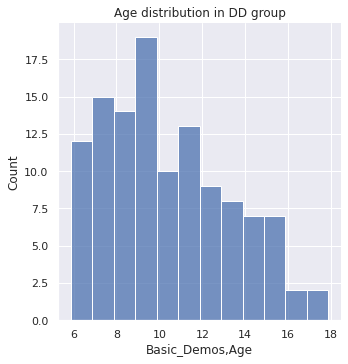

In [ ]:
sns.displot(data_filtered[data_filtered['Status'] == 1]['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in DD group');

In [ ]:
print('5-6 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] > 5) & (data_filtered['Basic_Demos,Age'] < 6) & (data_filtered['Status'] == 1)].shape[0])
print('6-7 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 6) & (data_filtered['Basic_Demos,Age'] < 7) & (data_filtered['Status'] == 1)].shape[0])
print('7-8 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 7) & (data_filtered['Basic_Demos,Age'] < 8) & (data_filtered['Status'] == 1)].shape[0])
print('8-9 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 8) & (data_filtered['Basic_Demos,Age'] < 9) & (data_filtered['Status'] == 1)].shape[0])
print('9-10 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 9) & (data_filtered['Basic_Demos,Age'] < 10) & (data_filtered['Status'] == 1)].shape[0])
print('10-11 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 10) & (data_filtered['Basic_Demos,Age'] < 11) & (data_filtered['Status'] == 1)].shape[0])
print('11-12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 11) & (data_filtered['Basic_Demos,Age'] < 12) & (data_filtered['Status'] == 1)].shape[0])
print('from 12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 12) & (data_filtered['Status'] == 1)].shape[0])

5-6 years old
1
6-7 years old
12
7-8 years old
17
8-9 years old
11
9-10 years old
20
10-11 years old
12
11-12 years old
12
from 12 years old
33
